In [1]:
import os
import datetime
import pytz
import pandas as pd
import geopandas as gpd
import matplotlib as mpl

## Data

In [2]:
data_dir = os.path.join(os.getcwd(), 'data')
print(data_dir)

/home/jack/Repos/sardinia-fires/data


> Source: Regione Sardegna – Perimetrazioni aree percorse dal fuoco [2005](http://dati.regione.sardegna.it/dataset/cfva-perimetrazioni-aree-percorse-dal-fuoco-2005), [2006](http://dati.regione.sardegna.it/dataset/cfva-perimetrazioni-aree-percorse-dal-fuoco-2006), [2007](http://dati.regione.sardegna.it/dataset/cfva-perimetrazioni-aree-percorse-dal-fuoco-2007), [2008](http://dati.regione.sardegna.it/dataset/cfva-perimetrazioni-aree-percorse-dal-fuoco-2008), [2009](http://dati.regione.sardegna.it/dataset/cfva-perimetrazioni-aree-percorse-dal-fuoco-2009), [2010](http://dati.regione.sardegna.it/dataset/cfva-perimetrazioni-aree-percorse-dal-fuoco-2010), [2011](http://dati.regione.sardegna.it/dataset/cfva-perimetrazioni-aree-percorse-dal-fuoco-2011), [2012](http://dati.regione.sardegna.it/dataset/cfva-perimetrazioni-aree-percorse-dal-fuoco-2012), [2013](http://dati.regione.sardegna.it/dataset/cfva-perimetrazioni-aree-percorse-dal-fuoco-2013), [2014](http://dati.regione.sardegna.it/dataset/cfva-perimetrazioni-delle-aree-percorse-dal-fuoco-nellanno-2014), [2015](http://dati.regione.sardegna.it/dataset/cfva-perimetri-dei-soprassuoli-percorsi-dal-fuoco-nellanno-2015), [2016](http://dati.regione.sardegna.it/dataset/cfva-perimetrazioni-aree-percorse-dal-fuoco-2016).
>
> License: [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).

## 2005

In [3]:
gdf2005 = gpd.read_file(os.path.join(data_dir, 'areeIncendiatePerim2005', 'areeIncendiatePerim2005.shp'))

Data from different years could have been stored with a different CRS (Coordinate Reference System), so we save this one.

In [4]:
crs = gdf2005.crs
crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 9,
 'k': 0.9996,
 'x_0': 1500000,
 'y_0': 0,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

In [5]:
gdf2005.head()

,idFeature,numIncen,data,localita,area,stazione,stir,geometry
0,1,10,2005-06-15,SA TELLA,0.5130,GUSPINI,CAGLIARI,"POLYGON ((1467943.449333117 4376264.308214546,..."
1,2,26,2005-07-11,SCIRIA,0.2824,GUSPINI,CAGLIARI,"POLYGON ((1464908.812084711 4378690.513136858,..."
2,3,53,2005-08-21,SEDDAS,2.5628,GUSPINI,CAGLIARI,"POLYGON ((1469193.337820135 4375750.722053908,..."
3,4,53,2005-08-21,SEDDAS,1.0182,GUSPINI,CAGLIARI,"POLYGON ((1469286.852807363 4375728.074198085,..."
4,5,7,2005-06-08,SERRA PUBUSA,0.6079,GUSPINI,CAGLIARI,"POLYGON ((1468811.117862606 4383861.048645113,..."


Remove unnecessary columns and use a more declarative (english) name.

In [6]:
gdf2005 = gdf2005\
    .reset_index(drop=True)\
    .drop(columns=['idFeature', 'stazione', 'stir'])\
    .rename(columns={'numIncen': 'num_fires', 'data': 'date', 'localita': 'toponym', 'area': 'hectars'})

Save the column order, this will be useful when concatenating all the geodataframes.

In [7]:
cols = ['toponym', 'hectars', 'date', 'num_fires', 'geometry']
gdf2005 = gdf2005[cols]

In [8]:
gdf2005.head()

,toponym,hectars,date,num_fires,geometry
0,SA TELLA,0.5130,2005-06-15,10,"POLYGON ((1467943.449333117 4376264.308214546,..."
1,SCIRIA,0.2824,2005-07-11,26,"POLYGON ((1464908.812084711 4378690.513136858,..."
2,SEDDAS,2.5628,2005-08-21,53,"POLYGON ((1469193.337820135 4375750.722053908,..."
3,SEDDAS,1.0182,2005-08-21,53,"POLYGON ((1469286.852807363 4375728.074198085,..."
4,SERRA PUBUSA,0.6079,2005-06-08,7,"POLYGON ((1468811.117862606 4383861.048645113,..."


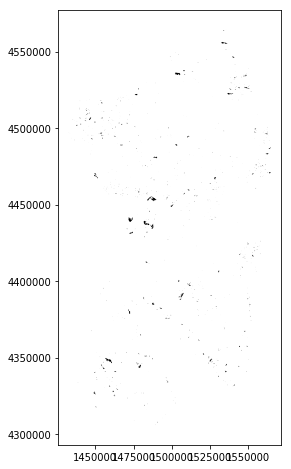

In [10]:
gdf2005.plot(figsize=(8, 8), facecolor='black')

## 2006

In [11]:
gdf2006 = gpd.read_file(os.path.join(data_dir, 'areeIncendiatePerim2006', 'areeIncendiatePerim2006.shp'))

In [12]:
gdf2006.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 9,
 'k': 0.9996,
 'x_0': 1500000,
 'y_0': 0,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

In [13]:
gdf2006 = gdf2006\
    .reset_index(drop=True)\
    .drop(columns=['idFeature', 'stazione', 'stir'])\
    .rename(columns={'numIncen': 'num_fires', 'data': 'date', 'localita': 'toponym', 'area': 'hectars'})

In [14]:
gdf2006 = gdf2006[cols]
gdf2006.head()

,toponym,hectars,date,num_fires,geometry
0,SS 197 RIO PIDONGI,1.4148,2006-06-12,5,"POLYGON ((1500027.947825692 4394127.825381035,..."
1,NURACEDDEU,1.3696,2006-06-14,8,"POLYGON ((1501717.979466737 4396633.136704235,..."
2,PISCINA BOI,1.0967,2006-06-20,19,"POLYGON ((1494058.02056277 4390145.045220802, ..."
3,PRAMESTIA,7.0486,2006-06-20,22,"POLYGON ((1492650.860644849 4390375.633944214,..."
4,MADONNA D'ITRIA,0.3689,2006-07-01,31,"POLYGON ((1494903.912577115 4387920.121564015,..."


## 2007

In [15]:
gdf2007 = gpd.read_file(os.path.join(data_dir, 'areeIncendiatePerim2007', 'areeIncendiatePerim2007.shp'))

In [16]:
gdf2007.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 9,
 'k': 0.9996,
 'x_0': 1500000,
 'y_0': 0,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

In [17]:
gdf2007 = gdf2007\
    .reset_index(drop=True)\
    .drop(columns=['idFeature', 'stazione', 'stir'])\
    .rename(columns={'numIncen': 'num_fires', 'data': 'date', 'localita': 'toponym', 'area': 'hectars'})

In [18]:
gdf2007 = gdf2007[cols]
gdf2007.head()

,toponym,hectars,date,num_fires,geometry
0,CHIGHIZZU,0.185999,2007-07-27,35,"POLYGON ((1464766.234174 4505556.716791, 14647..."
1,MANDRA E PORCOS,1.244460,2007-10-16,37,"POLYGON ((1446661.989183 4489138.588386, 14466..."
2,PAULI PARDO,0.102119,2007-06-20,14,"POLYGON ((1470245.025909 4392308.256092, 14702..."
3,MORIMNTA,9.369699,2007-07-11,9,"POLYGON ((1478672.105733 4325837.193252, 14786..."
4,BENNAXI,0.619435,2007-06-24,30,"POLYGON ((1473047.259336 4421140.471669, 14730..."


## 2008

In [19]:
gdf2008 = gpd.read_file(os.path.join(data_dir, 'areeIncendiatePerim2008', 'areeIncendiatePerim2008.shp'))

In [20]:
gdf2008.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 9,
 'k': 0.9996,
 'x_0': 1500000,
 'y_0': 0,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

In [21]:
gdf2008.head()

,idFeature,numIncen,data,localita,area,provincia,comune,prov2001,stazione,stir,geometry
0,1,12,2008-07-19,BELLISARE-LU PADRU,0.205142,Sassari,Sorso,Sassari,SASSARI,SASSARI,"POLYGON ((1462693.888265 4518473.419077, 14626..."
1,2,14,2008-07-19,BACCHILEDDU-CODDI TORTU,4.086602,Sassari,Sassari,Sassari,SASSARI,SASSARI,"POLYGON ((1438442.206808 4505431.185736, 14384..."
2,3,15,2008-07-19,CALANCOI,6.756662,Sassari,Sassari,Sassari,SASSARI,SASSARI,"POLYGON ((1467184.244177 4507882.357889, 14671..."
3,4,19,2008-07-30,SCALA ERRE,28.498707,Sassari,Sassari,Sassari,SASSARI,SASSARI,"POLYGON ((1439632.185723 4517939.328079, 14396..."
4,5,20,2008-08-02,MONTIGEDDU,0.184712,Sassari,Sennori,Sassari,SASSARI,SASSARI,"POLYGON ((1465299.806027 4515038.539969, 14652..."


In [22]:
gdf2008 = gdf2008\
    .reset_index(drop=True)\
    .drop(columns=['idFeature', 'provincia', 'comune', 'prov2001', 'stazione', 'stir'])\
    .rename(columns={'numIncen': 'num_fires', 'data': 'date', 'localita': 'toponym', 'area': 'hectars'})

In [23]:
gdf2008 = gdf2008[cols]
gdf2008.head()

,toponym,hectars,date,num_fires,geometry
0,BELLISARE-LU PADRU,0.205142,2008-07-19,12,"POLYGON ((1462693.888265 4518473.419077, 14626..."
1,BACCHILEDDU-CODDI TORTU,4.086602,2008-07-19,14,"POLYGON ((1438442.206808 4505431.185736, 14384..."
2,CALANCOI,6.756662,2008-07-19,15,"POLYGON ((1467184.244177 4507882.357889, 14671..."
3,SCALA ERRE,28.498707,2008-07-30,19,"POLYGON ((1439632.185723 4517939.328079, 14396..."
4,MONTIGEDDU,0.184712,2008-08-02,20,"POLYGON ((1465299.806027 4515038.539969, 14652..."


## 2009

In [24]:
gdf2009 = gpd.read_file(os.path.join(data_dir, 'areeIncendiatePerim2009', 'areeIncendiatePerim2009.shp'))

In [25]:
gdf2009.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 9,
 'k': 0.9996,
 'x_0': 1500000,
 'y_0': 0,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

In [26]:
gdf2009 = gdf2009\
    .reset_index(drop=True)\
    .drop(columns=['idFeature', 'provincia', 'comune', 'prov2001', 'stazione', 'stir'])\
    .rename(columns={'numIncen': 'num_fires', 'data': 'date', 'localita': 'toponym', 'area': 'hectars'})

In [27]:
gdf2009 = gdf2009[cols]
gdf2009.head()

,toponym,hectars,date,num_fires,geometry
0,ZUMPADU - SAN SATURNINO,0.1599,2009-05-24,4,"POLYGON ((1509624.203149145 4475129.624405298,..."
1,SU TRUNZU,0.2240,2009-05-22,1,"POLYGON ((1510066.504991238 4479509.299466223,..."
2,SU PORCRABU,1.4247,2009-05-22,2,"POLYGON ((1513014.918399244 4484497.443579723,..."
3,PEDRU MATTOLA,1.6775,2009-06-07,5,"POLYGON ((1506140.581211217 4478033.583387821,..."
4,SAE SERRERI,0.3701,2009-06-27,8,"POLYGON ((1516489.169512968 4478861.691350382,..."


## 2010

TODO: no idea why this dataset fails to load...

In [29]:
gdf2010 = gpd.read_file(os.path.join(data_dir, 'areeIncendiatePerim2010', 'areeIncendiatePerim2010.shp'))

CPLE_AppDefinedError: b'Recode from ISO 88591 to UTF-8 failed with the error: "Invalid argument".'

In [30]:
gdf2010.crs

NameError: name 'gdf2010' is not defined

In [31]:
gdf2010 = gdf2010\
    .reset_index(drop=True)\
    .drop(columns=['idFeature', 'provincia', 'comune', 'prov2001', 'stazione', 'stir'])\
    .rename(columns={'numIncen': 'num_fires', 'data': 'date', 'localita': 'toponym', 'area': 'hectars'})

NameError: name 'gdf2010' is not defined

In [32]:
gdf2010 = gdf2010[cols]
gdf2010.head()

NameError: name 'gdf2010' is not defined

## 2011

In [33]:
gdf2011 = gpd.read_file(os.path.join(data_dir, 'INC_areeIncendiatePerim_2011', 'INC_areeIncendiatePerim_2011.shp'))

In [34]:
gdf2011.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 9,
 'k': 0.9996,
 'x_0': 1500000,
 'y_0': 0,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

In [35]:
gdf2011 = gdf2011\
    .reset_index(drop=True)\
    .drop(columns=['idFeature', 'codIstatPr', 'provincia', 'comune', 'stazione', 'stir'])\
    .rename(columns={'numIncen': 'num_fires', 'data': 'date', 'localita': 'toponym', 'area': 'hectars'})

In [36]:
gdf2011 = gdf2011[cols]
gdf2011.head()

,toponym,hectars,date,num_fires,geometry
0,laccarissu,1.7111,2011-06-12,6,"POLYGON ((1502918.203045392 4396878.388241985,..."
1,Bia de Casteddu,0.2996,2011-05-27,3,"POLYGON ((1498239.881441411 4390619.839550531,..."
2,bau d'oru,1.5165,2011-04-20,2,"POLYGON ((1501232.649680909 4391777.497746172,..."
3,sa turriga,1.7097,2011-06-15,7,"POLYGON ((1499842.965155947 4388480.899779161,..."
4,Siali,1.6642,2011-06-18,9,"POLYGON ((1501232.13905252 4396485.607288373, ..."


## 2012

In [37]:
gdf2012 = gpd.read_file(os.path.join(data_dir, 'areeIncendiatePerim2012', 'areeIncendiatePerim2012.shp'))

In [38]:
gdf2012.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 9,
 'k': 0.9996,
 'x_0': 1500000,
 'y_0': 0,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

In [39]:
gdf2012 = gdf2012\
    .reset_index(drop=True)\
    .drop(columns=['IDFEATURE', 'PROVINCIA', 'COMUNE', 'STAZIONEFO', 'STIR'])\
    .rename(columns={'NUMEROINCE': 'num_fires', 'DATA': 'date', 'AREA': 'hectars', 'LOCALITA': 'toponym'})

In [40]:
gdf2012 = gdf2012[cols]
gdf2012.head()

,toponym,hectars,date,num_fires,geometry
0,BRUNCU QUADDUS,1.00,2012-03-18,1,"POLYGON ((1501379.726294283 4392444.75301626, ..."
1,MONTI ESSI,0.28,2012-05-26,3,"POLYGON ((1499519.9401604 4392003.565889612, 1..."
2,PALAMIRAI,1.83,2012-06-11,6,"POLYGON ((1496421.56483677 4386295.957518294, ..."
3,BENAZZU MANNU,1.55,2012-06-13,7,"POLYGON ((1495120.57563616 4387127.018131677, ..."
4,CASTELLO,0.53,2012-06-14,8,"POLYGON ((1498496.611606216 4392265.904079714,..."


## 2013

In [41]:
gdf2013 = gpd.read_file(os.path.join(data_dir, 'areeIncendiatePerim2013', 'areeIncendiatePerim2013.shp'))

In [42]:
gdf2013.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 9,
 'k': 0.9996,
 'x_0': 1500000,
 'y_0': 0,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

In [43]:
gdf2013 = gdf2013\
    .reset_index(drop=True)\
    .drop(columns=['IDFEATURE', 'PROVINCIA', 'COMUNE', 'STAZIONEFO', 'STIR'])\
    .rename(columns={'NUMEROINCE': 'num_fires', 'DATA': 'date', 'AREA': 'hectars', 'LOCALITA': 'toponym'})

In [44]:
gdf2013 = gdf2013[cols]
gdf2013.head()

,toponym,hectars,date,num_fires,geometry
0,CUCCURU S'ARRIU,1.84,2013-06-15,2,"POLYGON ((1501115.91523619 4387624.82057313, 1..."
1,S'ORTU S'INGEGNERI,0.13,2013-06-18,3,"POLYGON ((1503669.07441004 4397429.576084952, ..."
2,MORU PINTAU,0.92,2013-06-18,4,"POLYGON ((1497384.524600181 4388439.432288254,..."
3,BAU SANALI,0.58,2013-06-18,6,"POLYGON ((1497758.328532903 4388942.264419538,..."
4,SU PIPIREDDU,0.37,2013-06-21,7,"POLYGON ((1497901.759067144 4385343.350027164,..."


## 2014

In [45]:
gdf2014 = gpd.read_file(
    os.path.join(data_dir, 'areeIncendiatePerim2014', 'GB_Perimetri_Superfici_Bruciate_2014.shp'))

In [46]:
gdf2014.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 9,
 'k': 0.9996,
 'x_0': 1500000,
 'y_0': 0,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

In [47]:
gdf2014.columns

Index(['BASE_FID', 'ID_INCE', 'ISTAT', 'ID_PROV', 'PROVINCIA', 'STIR',
       'STAZIONE', 'COMUNE', 'TOPONIMO', 'DATA_INCE', 'N_INCE', 'TIPOLOGIE',
       'M2_BOSCO', 'M2_PASCOLO', 'M2_ALTRO', 'SUP_TOT_M2', 'SUP_TOT_HA',
       'geometry'],
      dtype='object')

In [48]:
gdf2014 = gdf2014\
    .reset_index(drop=True)\
    .drop(columns=['BASE_FID', 'ID_INCE', 'ISTAT', 'ID_PROV', 'PROVINCIA', 'STIR', 'STAZIONE',
                   'COMUNE', 'TIPOLOGIE', 'M2_BOSCO', 'M2_PASCOLO', 'M2_ALTRO', 'SUP_TOT_M2'])\
    .rename(columns={'TOPONIMO': 'toponym', 'DATA_INCE': 'date', 'N_INCE': 'num_fires', 'SUP_TOT_HA': 'hectars'})

In [49]:
gdf2014 = gdf2014[cols]
gdf2014.head()

,toponym,hectars,date,num_fires,geometry
0,IS CUCCUREDDUS,6.94,2014-05-10,2,"POLYGON ((1496769.667294378 4338436.998693652,..."
1,ISCA SA PINGIADA,0.88,2014-06-08,5,"POLYGON ((1495305.946695794 4339803.855554425,..."
2,MONTE ZARA,0.84,2014-05-13,12,"POLYGON ((1504395.187812032 4359435.817841106,..."
3,T. LENI,4.22,2014-05-15,18,"POLYGON ((1483945.879439993 4365624.444373743,..."
4,SEDDA RIU SA PIRA,4.17,2014-05-16,19,"POLYGON ((1516148.817279488 4349891.916450469,..."


## 2015

In [50]:
gdf2015 = gpd.read_file(
    os.path.join(data_dir, 'Perimetri_Superfici_Bruciate_2015', 'Perimetri_Superfici_Bruciate_2015.shp'))

In [51]:
gdf2015.crs

{'init': 'epsg:32632'}

In [52]:
gdf2015 = gdf2015.to_crs(crs=crs)
gdf2015.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 9,
 'k': 0.9996,
 'x_0': 1500000,
 'y_0': 0,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

In [53]:
gdf2015.columns

Index(['FID_STIR', 'ID_INCE', 'ANNO', 'ISTAT', 'PROV', 'STIR', 'STAZIONE',
       'COMUNE', 'TOPO_IGM', 'DT_INCE', 'NR_INCE', 'TIPOLOGIE', 'SUP_BOSCO',
       'SUP_PASCOL', 'SUP_ALTRO', 'SUP_TOT', 'MNCC_BOSCO', 'TIPO_INCE',
       'UTM_EST', 'UTM_NORD', 'SUP_1000', 'geometry'],
      dtype='object')

In [54]:
gdf2015 = gdf2015\
    .reset_index(drop=True)\
    .drop(columns=['FID_STIR', 'ID_INCE', 'ANNO', 'ISTAT', 'PROV', 'STIR', 'STAZIONE',
                   'COMUNE', 'TIPOLOGIE', 'SUP_BOSCO', 'SUP_PASCOL', 'SUP_ALTRO', 
                   'MNCC_BOSCO', 'TIPO_INCE', 'UTM_EST', 'UTM_NORD', 'SUP_1000'])\
    .rename(columns={'TOPO_IGM': 'toponym', 'DT_INCE': 'date', 'NR_INCE': 'num_fires', 'SUP_TOT': 'square_meters'})

In [55]:
gdf2015['hectars'] = gdf2015.square_meters / 10**4

In [56]:
gdf2015 = gdf2015[cols]
gdf2015.head()

,toponym,hectars,date,num_fires,geometry
0,FUNT.NA SA MURTA,1.2691,2015-03-10,7,"POLYGON ((1521799.01532264 4389850.235770836, ..."
1,SANTU LIANU,1.1983,2015-03-07,8,"POLYGON ((1527769.811592639 4341835.224896232,..."
2,RIU SU CANNISONI,0.7272,2015-04-11,9,"POLYGON ((1520391.406819938 4391450.710068475,..."
3,BACCU SA CANNA,0.4478,2015-04-16,10,"POLYGON ((1500643.930947975 4392183.250951256,..."
4,R. MURERA,1.8170,2015-04-21,11,"POLYGON ((1502523.607566311 4393321.072617586,..."


## 2016

In [57]:
gdf2016 = gpd.read_file(os.path.join(data_dir, 'areeIncendiatePerim2016', 'Perimetri_Superfici_Bruciate_2016.shp'))

In [58]:
gdf2016.crs

{'init': 'epsg:32632'}

In [59]:
gdf2016 = gdf2016.to_crs(crs=crs)
gdf2016.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 9,
 'k': 0.9996,
 'x_0': 1500000,
 'y_0': 0,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

In [60]:
gdf2016.columns

Index(['BASE_FID', 'ID_INCE', 'ISTAT', 'ID_PROV', 'STIR', 'STAZIONE', 'COMUNE',
       'TOPONIMO', 'DATA_INCE', 'N_INCE', 'TIPOLOGIE', 'M2_BOSCO',
       'M2_PASCOLO', 'M2_ALTRO', 'SUP_TOT_M2', 'SUP_TOT_HA', 'TIPO_INCE',
       'dist_ins', 'ID_RILIEVO', 'MODIFICHE', 'geometry'],
      dtype='object')

In [61]:
gdf2016 = gdf2016\
    .reset_index(drop=True)\
    .drop(columns=['BASE_FID', 'ID_INCE', 'ISTAT', 'ID_PROV', 'STIR', 'STAZIONE',
                   'COMUNE', 'TIPOLOGIE', 'M2_BOSCO', 'M2_PASCOLO', 'M2_ALTRO', 'SUP_TOT_M2',
                   'TIPO_INCE', 'dist_ins', 'ID_RILIEVO', 'MODIFICHE'])\
    .rename(columns={'TOPONIMO': 'toponym', 'DATA_INCE': 'date', 'N_INCE': 'num_fires', 'SUP_TOT_HA': 'hectars'})

In [62]:
gdf2016 = gdf2016[cols]
gdf2016.head()

,toponym,hectars,date,num_fires,geometry
0,SPIRICOCCU,0.53,2016-02-04,2045,"POLYGON ((1528118.492432319 4347561.205498368,..."
1,P.TA SA PRUNA CRISTI,2.56,2016-02-05,2047,"POLYGON ((1502956.557096611 4323813.208264956,..."
2,S'ACCUTZEREI,1.25,2016-01-21,2049,"POLYGON ((1521063.022701906 4391171.287329249,..."
3,R. DE MALFATANO,3.42,2016-04-17,2057,"POLYGON ((1483273.702332926 4306268.459096371,..."
4,C. ARGIOLAS,0.52,2016-04-20,2060,"POLYGON ((1524108.568798102 4350486.969594998,..."


## Concatenate all the GeoDataFrames

In [63]:
gdf = pd.concat([gdf2005, gdf2006, gdf2007,
                 gdf2008, gdf2009, #gdf2010,
                 gdf2011, gdf2012, gdf2013,
                 gdf2014, gdf2015, gdf2016])

In [64]:
gdf['year'] = gdf.date.apply(lambda d: d.split('-')[0])

In [65]:
cmap = mpl.cm.get_cmap('tab10')
rgba_colors = [cmap(i) for i in range(cmap.N)]
hex_colors = [mpl.colors.rgb2hex(rgba[:3]) for rgba in rgba_colors]
hex_colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

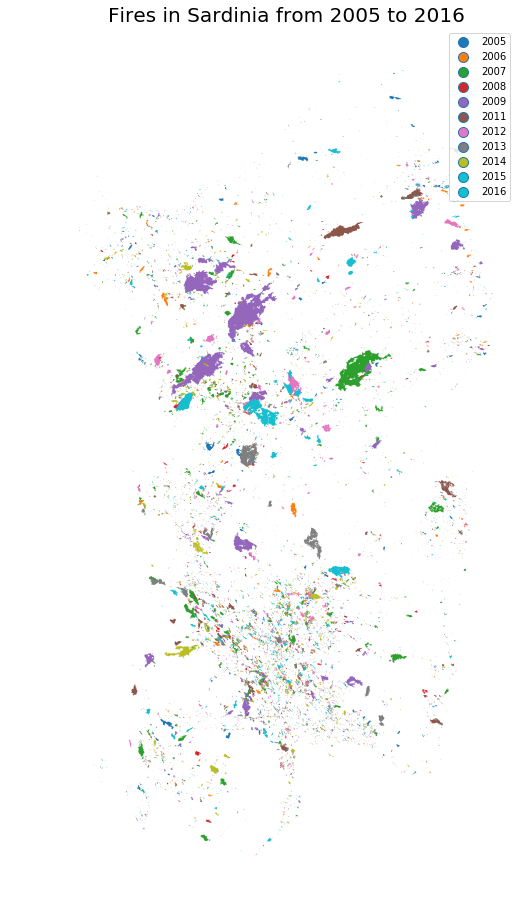

In [66]:
ax = gdf.plot(figsize=(16, 16), column='year', alpha=1.0, cmap='tab10', legend=True)
ax.set_axis_off()
ax.set_title('Fires in Sardinia from 2005 to 2016', fontsize=20);

## Convert tmerc to EPSG:4326 (WGS84)

See [EPSG:4326](https://epsg.io/4326).

In [67]:
gdfwgs84 = gdf.to_crs(epsg=4326)
gdfwgs84.crs

{'init': 'epsg:4326', 'no_defs': True}

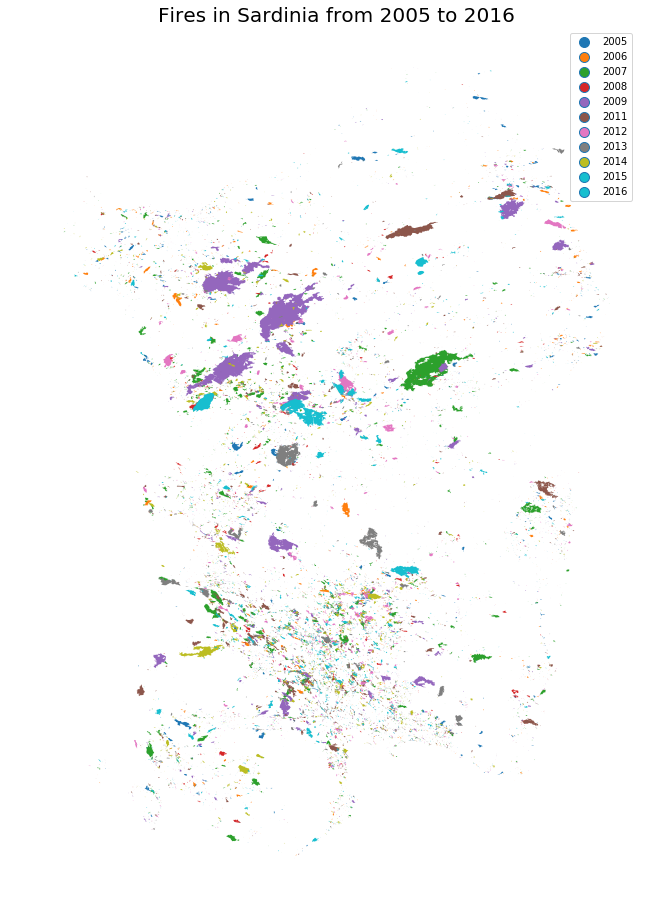

In [68]:
ax = gdfwgs84.plot(figsize=(16, 16), column='year', alpha=1.0, cmap='tab10', legend=True)
ax.set_axis_off()
ax.set_title('Fires in Sardinia from 2005 to 2016', fontsize=20);

## Add latitude and longitude

In [69]:
gdfwgs84['CentroidLongitude'] = gdfwgs84['geometry'].apply(lambda poly: poly.centroid.bounds[0])
gdfwgs84['CentroidLatitude'] = gdfwgs84['geometry'].apply(lambda poly: poly.centroid.bounds[1])

## Convert the date string into a timestamp

In [70]:
def from_date_to_timestamp(date_string):
    """Convert a date string into a UTC timestamp.
    
    See Also: https://www.unixtimestamp.com/index.php
    """
    d_naive = datetime.datetime.strptime(date_string, '%Y-%m-%d')
    pst = pytz.timezone('Europe/Rome')
    d_localized = pst.localize(d_naive)
    d_utc = d_localized.astimezone(pytz.UTC)
    epoch_utc = datetime.datetime(1970, 1, 1, 0, 0, 0, tzinfo=pytz.UTC)
    ts = int((d_utc - epoch_utc).total_seconds())
    return ts

In [71]:
gdfwgs84['timestamp'] = gdfwgs84['date'].apply(from_date_to_timestamp)

In [72]:
gdfwgs84.head()

,toponym,hectars,date,num_fires,geometry,year,CentroidLongitude,CentroidLatitude,timestamp
0,SA TELLA,0.5130,2005-06-15,10,"POLYGON ((8.626989820101423 39.53477118277521,...",2005,8.626981,39.534349,1118786400
1,SCIRIA,0.2824,2005-07-11,26,"POLYGON ((8.591551435192963 39.55651268309268,...",2005,8.591879,39.556340,1121032800
2,SEDDAS,2.5628,2005-08-21,53,"POLYGON ((8.641557053092074 39.53018947953248,...",2005,8.642629,39.528898,1124575200
3,SEDDAS,1.0182,2005-08-21,53,"POLYGON ((8.642646148717345 39.52998876994026,...",2005,8.643291,39.529210,1124575200
4,SERRA PUBUSA,0.6079,2005-06-08,7,"POLYGON ((8.636728811452041 39.60325007132692,...",2005,8.636842,39.602978,1118181600


## Export

If we include all the geometries, the CSV grows too big (~150 MB), so we drop the column `geometry`.

In [73]:
df = gdfwgs84.drop(columns=['geometry', 'date'])

In [74]:
df.to_csv('sardinia_fires.csv')

You can drag & drop the CSV into Uber's [Kepler.gl](http://kepler.gl/#/) and explore the data.

## Credits

This work was inspired by Mauro Melis's Sardegna in Fiamme (Sardinia on Fire). [App](https://mauromelis.gitlab.io/sardinia-on-fire/), [description](http://contest.formez.it/content/sardegna-fiamme).